<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2022DataProjectB/blob/Ahmads_Arbeitsbereich/Datenpruefung/Datenpruefung_neu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Datenprüfung

In [1]:
# Bibliotheken laden
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Git klonen
%cd /content/
%rm -r ./DMA2022DataProjectB
!git clone https://github.com/Fuenfgeld/DMA2022DataProjectB.git
    
%cd ./DMA2022DataProjectB/

# Tabellen laden
patient = pd.read_csv('BreastCancerData/patients.csv', sep=",")
condition = pd.read_csv('BreastCancerData/conditions.csv', sep=",")
medication = pd.read_csv('BreastCancerData/medications.csv', sep=",")
observation = pd.read_csv('BreastCancerData/observations.csv', sep=",")
procedure = pd.read_csv('BreastCancerData/procedures.csv', sep=",")

/content
rm: cannot remove './DMA2022DataProjectB': No such file or directory
Cloning into 'DMA2022DataProjectB'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 173 (delta 53), reused 60 (delta 21), pack-reused 55
Receiving objects: 100% (173/173), 3.25 MiB | 1.37 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/DMA2022DataProjectB


# 3.1 Auf ungültige Werte prüfen

Anzahl ungültiger Werte in 'patient'

 Id                        0
BIRTHDATE                 0
DEATHDATE              1000
SSN                       0
DRIVERS                 165
PASSPORT                216
PREFIX                  188
FIRST                     0
LAST                      0
SUFFIX                 1004
MAIDEN                  739
MARITAL                 330
RACE                      0
ETHNICITY                 0
GENDER                    0
BIRTHPLACE                0
ADDRESS                   0
CITY                      0
STATE                     0
COUNTY                    0
ZIP                     464
LAT                       0
LON                       0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
dtype: int64 



Anzahl ungültiger Werte in 'condition'

 START            0
STOP           222
PATIENT          0
ENCOUNTER        0
CODE             0
DESCRIPTION      0
dtype: int64 



Anzahl ungültiger Werte in 'medication'

 START                  0
STOP 

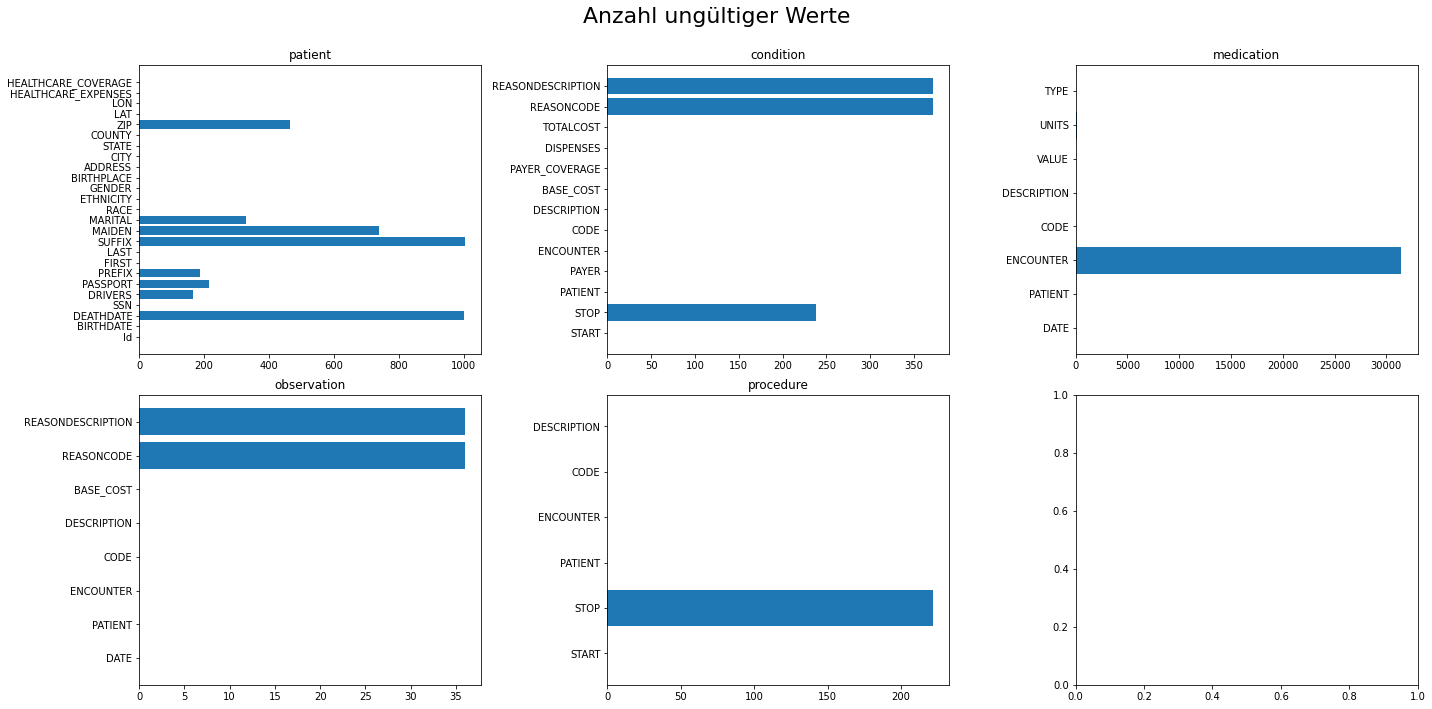

In [160]:
print("Anzahl ungültiger Werte in 'patient'\n\n", patient.isna().sum(),"\n\n\n")
print("Anzahl ungültiger Werte in 'condition'\n\n", condition.isna().sum(),"\n\n\n")
print("Anzahl ungültiger Werte in 'medication'\n\n", medication.isna().sum(),"\n\n\n")
print("Anzahl ungültiger Werte in 'observation'\n\n", observation.isna().sum(),"\n\n\n")
print("Anzahl ungültiger Werte in 'procedure'\n\n", procedure.isna().sum(),"\n\n\n")

#patient.isna().sum().plot.barh()
#condition.isna().sum().plot.barh()
#medication.isna().sum().plot.barh()
#observation.isna().sum().plot.barh()
#procedure.isna().sum().plot.barh()



Werte_patient = []
for i in range(len(patient.isna().sum())):
  Werte_patient.append(patient.isna().sum()[i])

Werte_condition = []
for i in range(len(condition.isna().sum())):
  Werte_condition.append(condition.isna().sum()[i])
  
Werte_medication = []
for i in range(len(medication.isna().sum())):
  Werte_medication.append(medication.isna().sum()[i])

Werte_observation = []
for i in range(len(observation.isna().sum())):
  Werte_observation.append(observation.isna().sum()[i])

Werte_procedure = []
for i in range(len(procedure.isna().sum())):
  Werte_procedure.append(procedure.isna().sum()[i])


fig, ax = plt.subplots(2, 3, figsize=(20,10))

ax[0,0].barh(list(patient.columns.values), Werte_patient)
ax[1,1].barh(list(condition.columns.values), Werte_condition)
ax[0,1].barh(list(medication.columns.values), Werte_medication)
ax[0,2].barh(list(observation.columns.values), Werte_observation)
ax[1,0].barh(list(procedure.columns.values), Werte_procedure)
ax[0,0].set_title('patient')
ax[0,1].set_title('condition')
ax[0,2].set_title('medication')
ax[1,0].set_title('observation')
ax[1,1].set_title('procedure')
plt.tight_layout() # damit zwischen den Grafiken Abstand für die y-Achsen-Beschriftung geschaffen wird
plt.suptitle('Anzahl ungültiger Werte', fontsize=22)
plt.subplots_adjust(top=0.9)
plt.show()



# 3.2 Primärschlüsselermittlung

In [48]:
print("Ist die 'Id' nur einmalig vorhanden und eignet sich damit als Primärschlüssel:", patient['Id'].is_unique)

Ist die 'Id' nur einmalig vorhanden und eignet sich damit als Primärschlüssel: True


# 3.3 Duplikatprüfung

Tabelle 'patient'
Duplikate in Id enthalten:  False
Duplikate in BIRTHDATE enthalten:  True
Duplikate in DEATHDATE enthalten:  True
Duplikate in SSN enthalten:  False
Duplikate in DRIVERS enthalten:  True
Duplikate in PASSPORT enthalten:  True
Duplikate in PREFIX enthalten:  True
Duplikate in FIRST enthalten:  True
Duplikate in LAST enthalten:  True
Duplikate in SUFFIX enthalten:  True
Duplikate in MAIDEN enthalten:  True
Duplikate in MARITAL enthalten:  True
Duplikate in RACE enthalten:  True
Duplikate in ETHNICITY enthalten:  True
Duplikate in GENDER enthalten:  True
Duplikate in BIRTHPLACE enthalten:  True
Duplikate in ADDRESS enthalten:  False
Duplikate in CITY enthalten:  True
Duplikate in STATE enthalten:  True
Duplikate in COUNTY enthalten:  True
Duplikate in ZIP enthalten:  True
Duplikate in LAT enthalten:  False
Duplikate in LON enthalten:  False
Duplikate in HEALTHCARE_EXPENSES enthalten:  True
Duplikate in HEALTHCARE_COVERAGE enthalten:  True


Tabelle 'condition'
Duplikate 

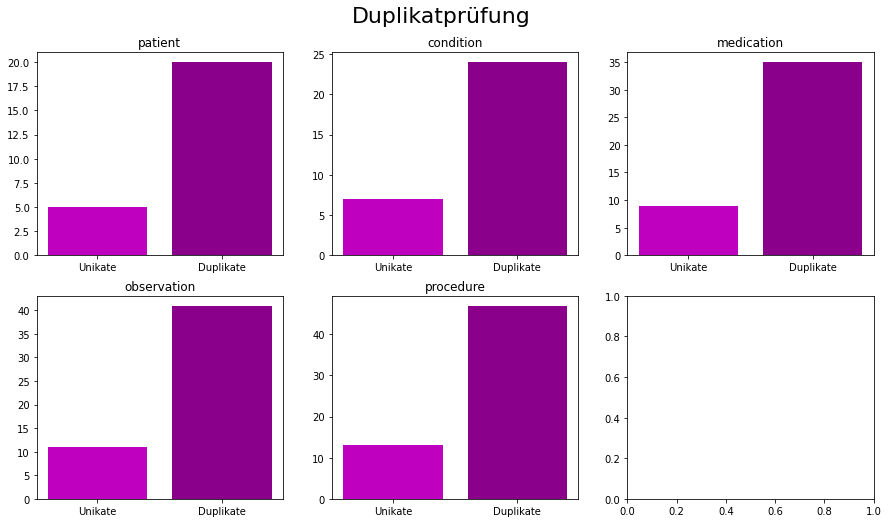

In [177]:
#patient['Id'].duplicated()
Duplikate = 0; Unikate = 0

print("Tabelle 'patient'")
for i in range(len(list(patient.columns.values))):
  print("Duplikate in", list(patient.columns.values)[i], "enthalten: ", not patient[list(patient.columns.values)[i]].is_unique) # not damit Duplikate und nicht Unikate angezeigt werden
  Duplikate = Duplikate + (not patient[list(patient.columns.values)[i]].is_unique)
  Unikate = Unikate + patient[list(patient.columns.values)[i]].is_unique
values = [Unikate,Duplikate]


print("\n\nTabelle 'condition'")  
for i in range(len(list(condition.columns.values))):
  print("Duplikate in", list(condition.columns.values)[i], "enthalten: ", not condition[list(condition.columns.values)[i]].is_unique) # not damit Duplikate und nicht Unikate angezeigt werden
  Duplikate = Duplikate + (not patient[list(patient.columns.values)[i]].is_unique)
  Unikate = Unikate + patient[list(patient.columns.values)[i]].is_unique
values_1 = [Unikate,Duplikate]

print("\n\nTabelle 'medication'") 
for i in range(len(list(medication.columns.values))):
  print("Duplikate in", list(medication.columns.values)[i], "enthalten: ", not medication[list(medication.columns.values)[i]].is_unique) # not damit Duplikate und nicht Unikate angezeigt werden
  Duplikate = Duplikate + (not patient[list(patient.columns.values)[i]].is_unique)
  Unikate = Unikate + patient[list(patient.columns.values)[i]].is_unique
values_2 = [Unikate,Duplikate]

print("\n\nTabelle 'observation'") 
for i in range(len(list(observation.columns.values))):
  print("Duplikate in", list(observation.columns.values)[i], "enthalten: ", not observation[list(observation.columns.values)[i]].is_unique) # not damit Duplikate und nicht Unikate angezeigt werden
  Duplikate = Duplikate + (not patient[list(patient.columns.values)[i]].is_unique)
  Unikate = Unikate + patient[list(patient.columns.values)[i]].is_unique
values_3 = [Unikate,Duplikate]

print("\n\nTabelle 'procedure'") 
for i in range(len(list(procedure.columns.values))):
  print("Duplikate in", list(procedure.columns.values)[i], "enthalten: ", not procedure[list(procedure.columns.values)[i]].is_unique) # not damit Duplikate und nicht Unikate angezeigt werden
  Duplikate = Duplikate + (not patient[list(patient.columns.values)[i]].is_unique)
  Unikate = Unikate + patient[list(patient.columns.values)[i]].is_unique
values_4 = [Unikate,Duplikate]


names = ['Unikate', 'Duplikate']
fig, ax = plt.subplots(2, 3, figsize=(15,8))

ax[0,0].bar(names, values,   color=['m', 'darkmagenta'])
ax[0,1].bar(names, values_1, color=['m', 'darkmagenta'])
ax[0,2].bar(names, values_2, color=['m', 'darkmagenta'])
ax[1,0].bar(names, values_3, color=['m', 'darkmagenta'])
ax[1,1].bar(names, values_4, color=['m', 'darkmagenta'])
ax[0,0].set_title('patient')
ax[0,1].set_title('condition')
ax[0,2].set_title('medication')
ax[1,0].set_title('observation')
ax[1,1].set_title('procedure')

plt.suptitle('Duplikatprüfung', fontsize=22)
plt.subplots_adjust(top=0.9)
plt.show()

# 3.4 Tabellen joinen

In [178]:
Neu_Tab = patient.join(condition.set_index('PATIENT'), on='Id').join(procedure.set_index('PATIENT'), on='Id', lsuffix='_condition', rsuffix='_procedure').join(medication.set_index('PATIENT'), on='Id', rsuffix='_medication').join(observation.set_index('PATIENT'), on='Id', rsuffix='_observation') 
Neu_Tab.head()
#list(Neu_Tab.columns.values)


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,TOTALCOST,REASONCODE_medication,REASONDESCRIPTION_medication,DATE_observation,ENCOUNTER_observation,CODE_observation,DESCRIPTION_observation,VALUE,UNITS,TYPE
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,1472.58,NaN,NaN,2010-06-22T10:47:46Z,NaN,QALY,QALY,53.0,a,numeric
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,1472.58,NaN,NaN,2011-06-22T10:47:46Z,NaN,QALY,QALY,54.0,a,numeric
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,1472.58,NaN,NaN,2012-06-22T10:47:46Z,NaN,QALY,QALY,55.0,a,numeric
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,1472.58,NaN,NaN,2013-06-22T10:47:46Z,NaN,QALY,QALY,56.0,a,numeric
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,1472.58,NaN,NaN,2014-06-22T10:47:46Z,NaN,QALY,QALY,57.0,a,numeric
